# CSE 578: Data Visualization Project
## Sahil Yogesh Hadke | shadke1@asu.edu | 1229679960

### Import Statements

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read input

In [94]:
# Define the headers based on your provided structure
headers = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

data_panda_dataframe = pd.read_csv('./data/adult.data', header=None, names=headers) 

In [95]:
data_panda_dataframe['age'].count()

32561

### Data Preprocessing

In [96]:
# drop columns which are not relevant
data_panda_dataframe = data_panda_dataframe.drop(['fnlwgt', 'education-num'], axis=1)

In [97]:
# Remove ? (NaN)
data_panda_dataframe.replace(' ?', np.nan, inplace=True)
data_panda_dataframe = data_panda_dataframe.dropna()

In [98]:
data_panda_dataframe['age'].count()

30162

### Export to Excel for better understanding and exploring

In [99]:
data_panda_dataframe.to_csv("./data/data.csv")

### User Story 1 (Multivariate)
#### Age, Hours Per Week Vs. Income

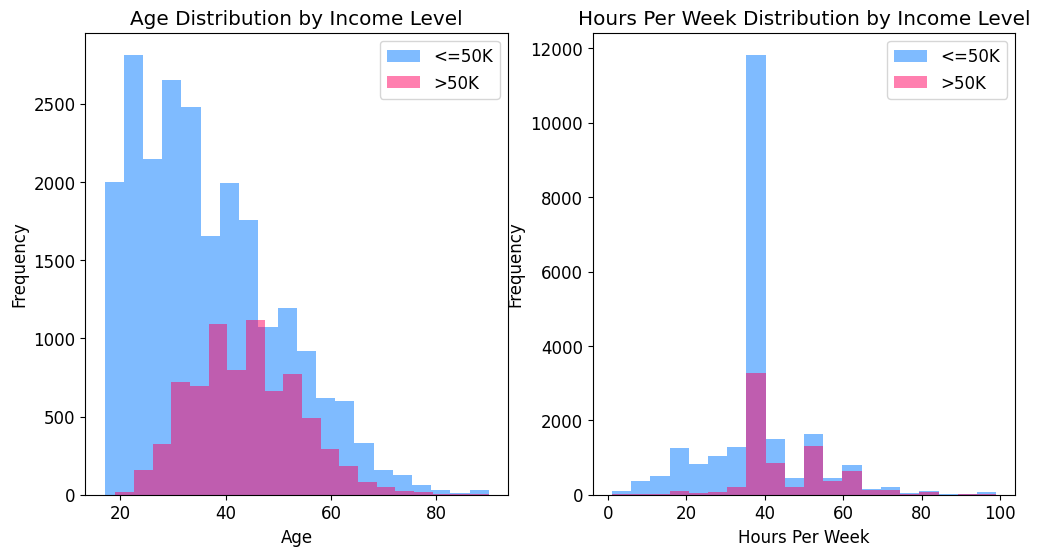

In [100]:
# Age Income Analysis
income_low = data_panda_dataframe[data_panda_dataframe['income'] == ' <=50K']
income_high = data_panda_dataframe[data_panda_dataframe['income'] == ' >50K']

# Create a figure and axis
fig, ax = plt.subplots(1,2, figsize=(12, 6))

# Plot the histograms for both income levels
ax[0].hist(income_low['age'], bins=20, alpha=0.5, label='<=50K', color='#0079FF')
ax[0].hist(income_high['age'], bins=20, alpha=0.5, label='>50K', color='#FF0060')

# Add labels and title
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Age Distribution by Income Level')
ax[0].legend()


# Plot the histograms for both income levels
ax[1].hist(income_low['hours-per-week'], bins=20, alpha=0.5, label='<=50K', color='#0079FF')
ax[1].hist(income_high['hours-per-week'], bins=20, alpha=0.5, label='>50K', color='#FF0060')

# Add labels and title
ax[1].set_xlabel('Hours Per Week')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Hours Per Week Distribution by Income Level')
ax[1].legend()

# Show the plot
plt.show()

#### Scatterplot

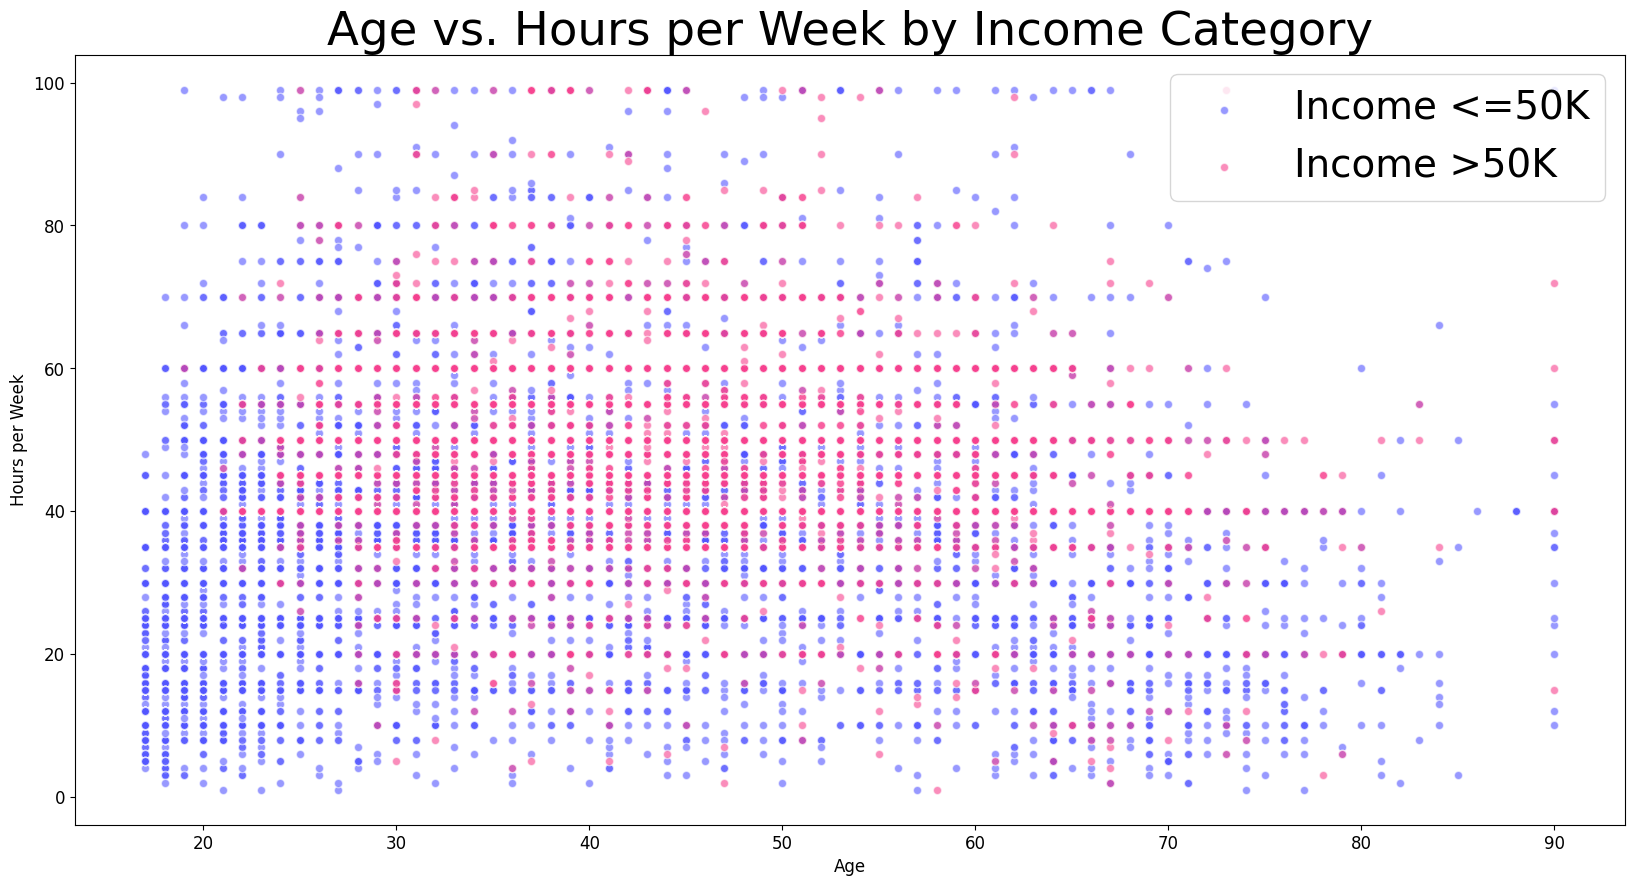

In [101]:
# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

plt.rcParams['font.size'] = '28'
# Scatter plot for income <=50K
subset2 = data_panda_dataframe[data_panda_dataframe['income'] == ' <=50K']
sc2 = ax.scatter(subset2['age'], subset2['hours-per-week'], label='Income <=50K', alpha=0.6, edgecolor='w', color='#5356FF')

# Scatter plot for income >50K
subset1 = data_panda_dataframe[data_panda_dataframe['income'] == ' >50K']
sc1 = ax.scatter(subset1['age'], subset1['hours-per-week'], label='Income >50K', alpha=0.6, edgecolor='w', color='#F7418F')

ax.set_title('Age vs. Hours per Week by Income Category')
ax.set_xlabel('Age')
ax.set_ylabel('Hours per Week')
ax.legend()

# font = {'size'   : 24}

# plt.rc('font', **font)
plt.rcParams['font.weight'] = 'normal'


# plt.show()

### User Story 2 (Multivariate)
#### Age, Capital Gain Vs. Income

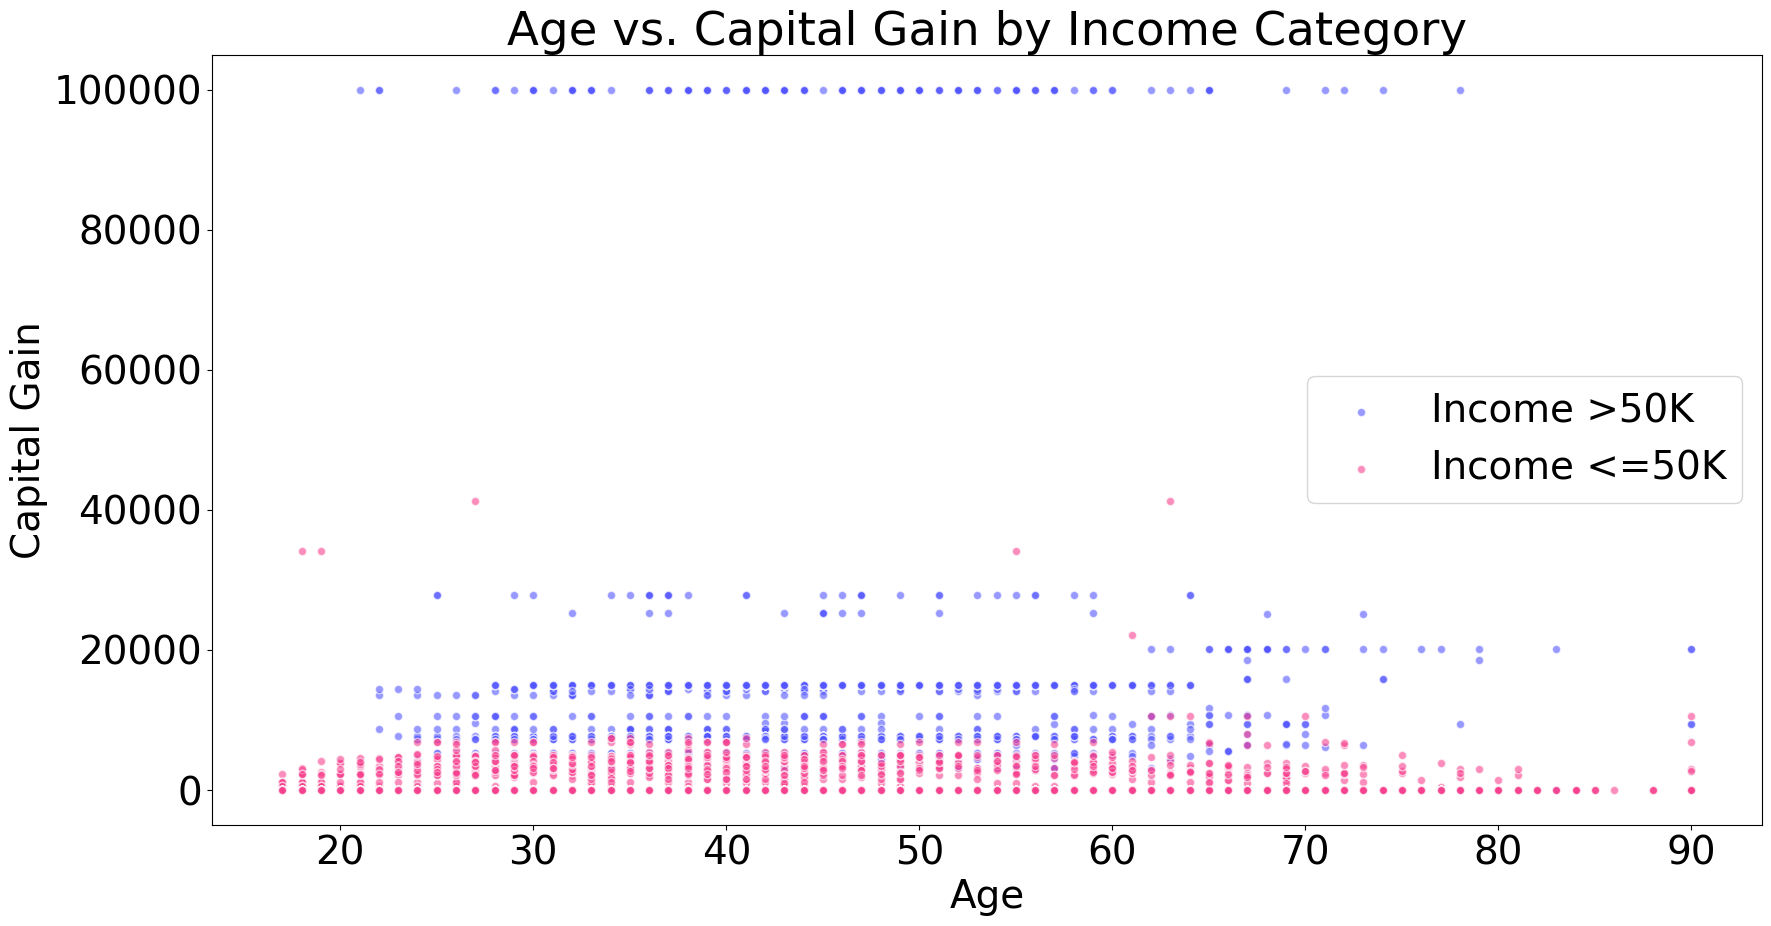

In [102]:
# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Scatter plot for income >50K
subset1 = data_panda_dataframe[data_panda_dataframe['income'] == ' >50K']
sc1 = ax.scatter(subset1['age'], subset1['capital-gain'], label='Income >50K', alpha=0.6, edgecolor='w', color='#5356FF')

# Scatter plot for income <=50K
subset2 = data_panda_dataframe[data_panda_dataframe['income'] == ' <=50K']
sc2 = ax.scatter(subset2['age'], subset2['capital-gain'], label='Income <=50K', alpha=0.6, edgecolor='w', color='#F7418F')

ax.set_title('Age vs. Capital Gain by Income Category')
ax.set_xlabel('Age')
ax.set_ylabel('Capital Gain')
ax.legend()

plt.show()


### User Story 3(Univariate)
#### Workclass Vs. Income

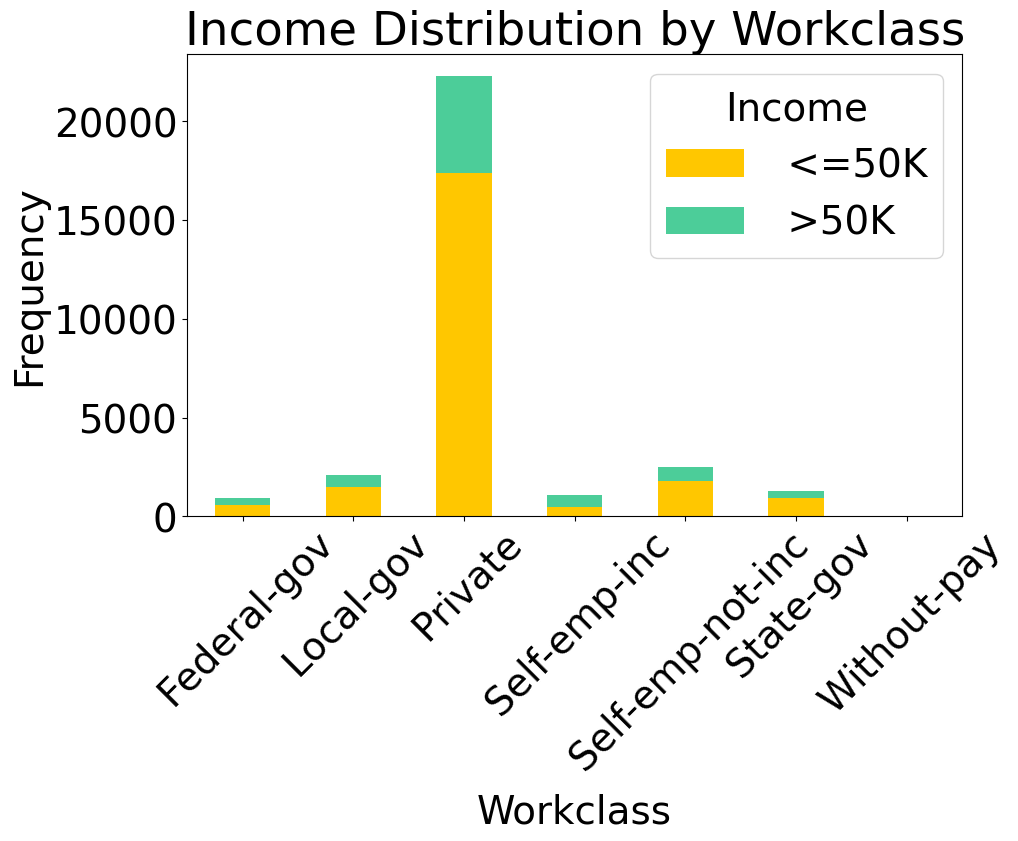

In [103]:
# Create a cross-tabulation of workclass and income
workclass_income_ct = pd.crosstab(data_panda_dataframe['workclass'], data_panda_dataframe['income'])

# Plotting

colors = ['#FFC700', '#4CCD99'] 
workclass_income_ct.plot(kind='bar', figsize=(10, 6), stacked=True, color=colors)
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Income')

plt.rcParams['font.size'] = '12'

plt.show()

### User Story 4 (Univariate)
#### Marital Status and Income

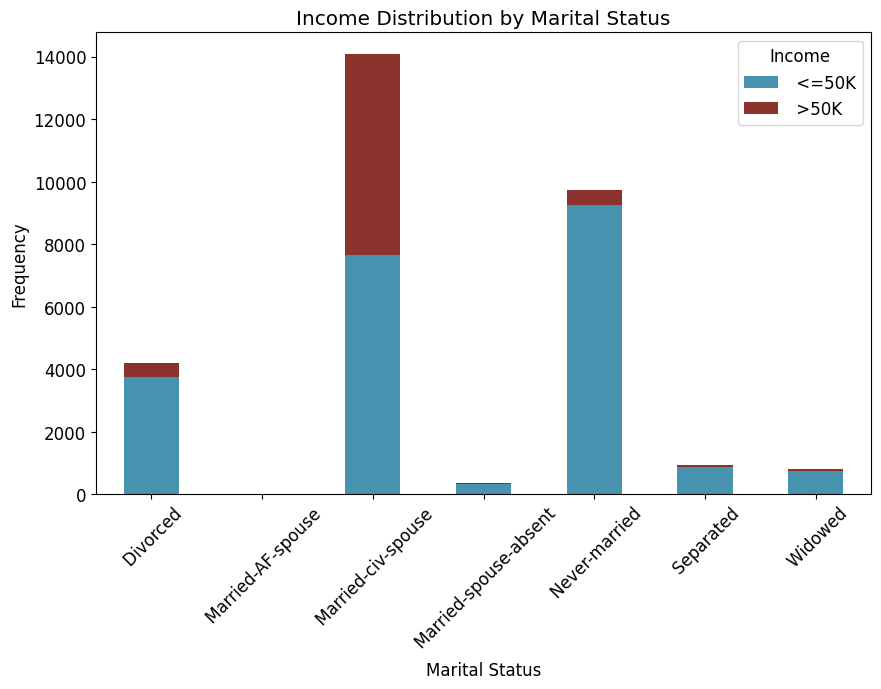

In [104]:
# Create a cross-tabulation of workclass and income
workclass_income_ct = pd.crosstab(data_panda_dataframe['marital-status'], data_panda_dataframe['income'])

# Plotting

colors = ['#4793AF', '#8B322C'] 
workclass_income_ct.plot(kind='bar', figsize=(10, 6), stacked=True, color=colors)
plt.title('Income Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Income')

plt.show()

### User Story 5 (Multivariate)
#### Race, Sex Vs. Income

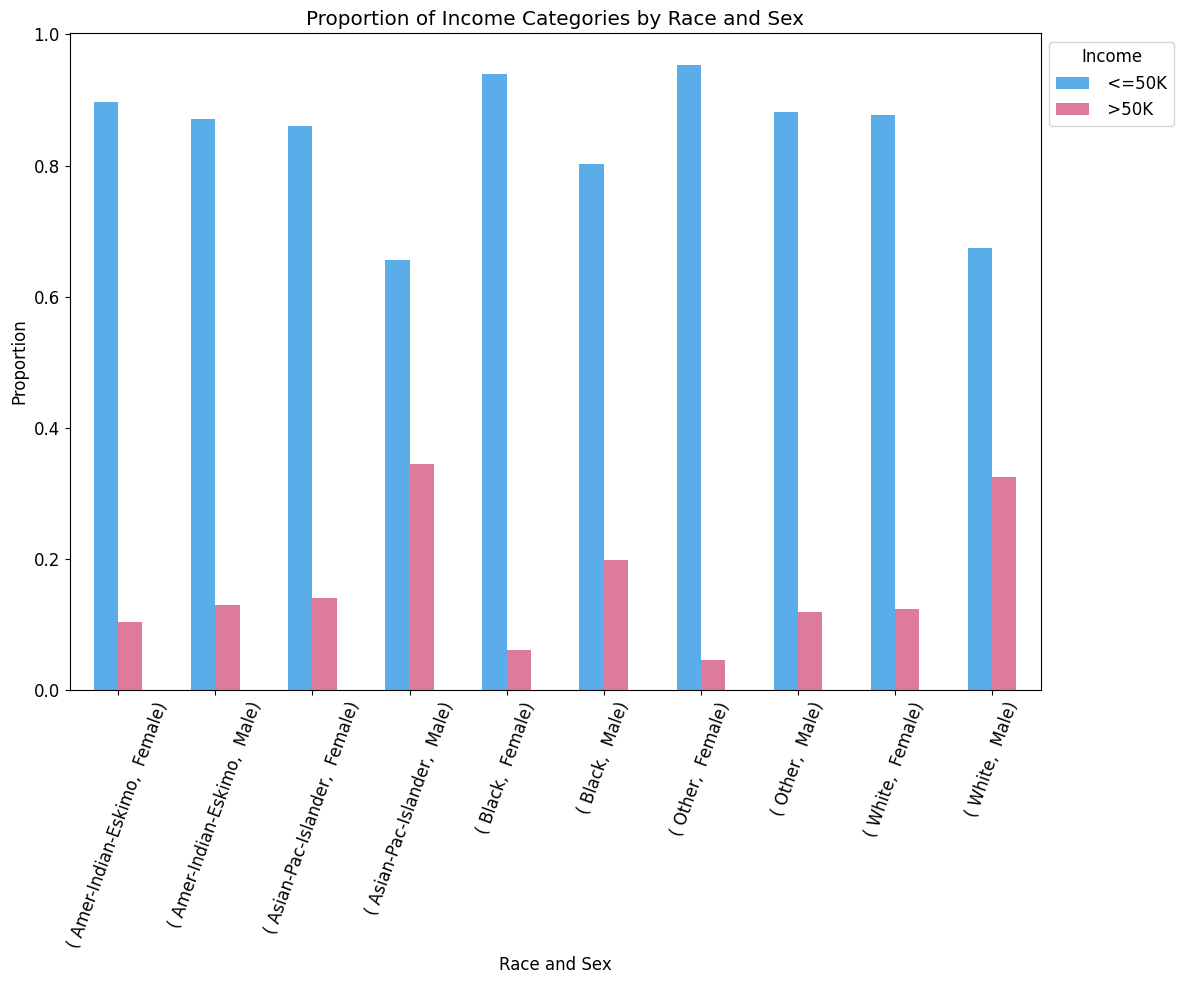

In [105]:
race_sex_income_counts = data_panda_dataframe.groupby(['race', 'sex', 'income']).size().unstack().fillna(0)

# Normalizing to show proportions
race_sex_income_props = race_sex_income_counts.div(race_sex_income_counts.sum(axis=1), axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))
colors = ['#5aade8', '#de7a9b'] 
race_sex_income_props.plot(kind='bar', stacked=False, ax=ax, color=colors)
plt.title('Proportion of Income Categories by Race and Sex')
plt.xlabel('Race and Sex')
plt.ylabel('Proportion')
plt.xticks(rotation=70)
plt.legend(title='Income', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### User Story 6 (Multivariate)
#### Age, Relationship Vs. Income

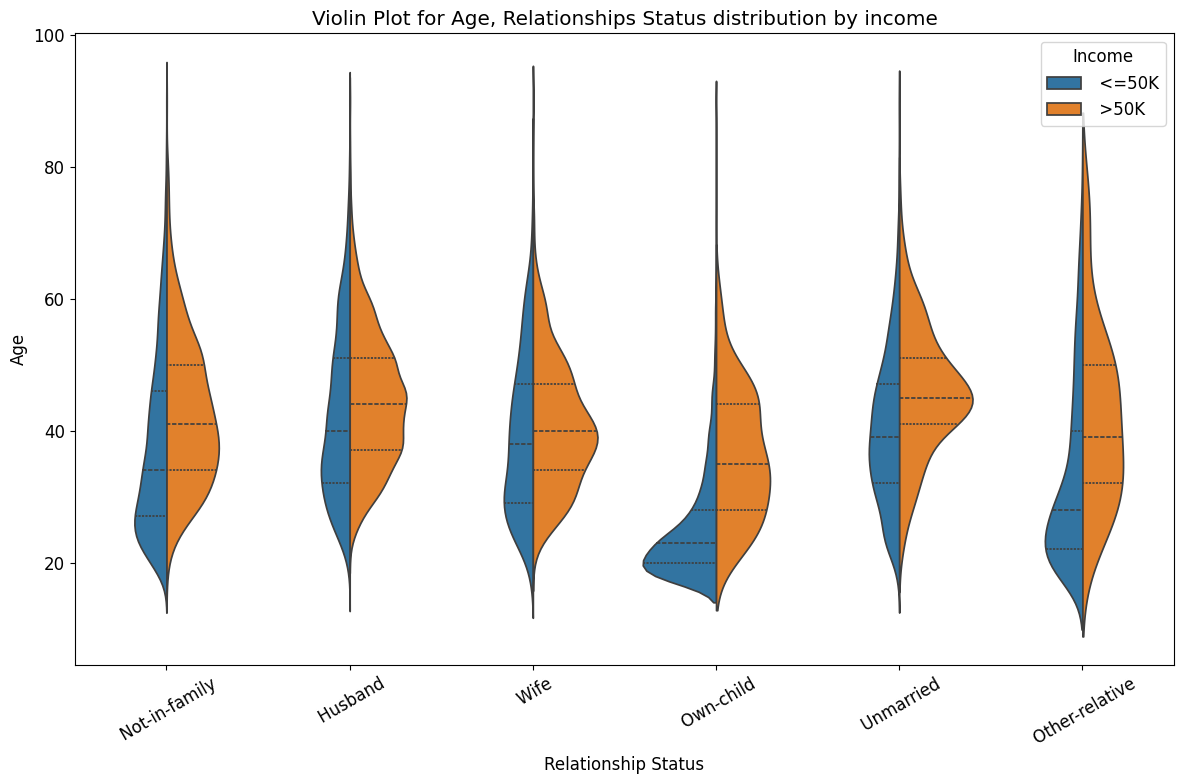

In [106]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='relationship', y='age', hue='income', data=data_panda_dataframe, split=True, inner='quartile')
plt.title('Violin Plot for Age, Relationships Status distribution by income')
plt.xlabel('Relationship Status')
plt.ylabel('Age')
plt.xticks(rotation=30)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()

plt.rcParams['font.size'] = '12'

plt.show()


# Extra

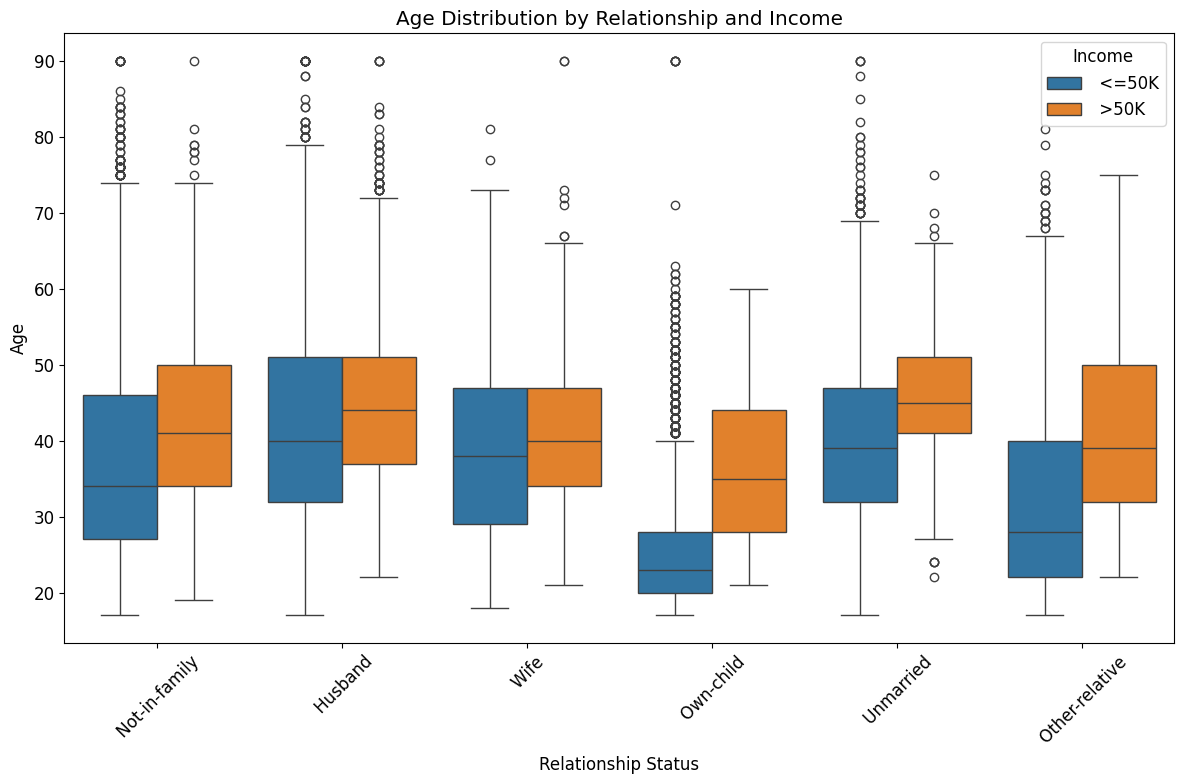

In [107]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='relationship', y='age', hue='income', data=data_panda_dataframe)
plt.title('Age Distribution by Relationship and Income')
plt.xlabel('Relationship Status')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()

plt.show()